In [1]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


In [2]:
import tensorflow as tf
from tensorflow.keras import layers

print("TensorFlow version:", tf.__version__)
print("Keras layers imported successfully!")


TensorFlow version: 2.10.1
Keras layers imported successfully!


In [5]:
# Step 2: Load and preprocess the MNIST dataset
# Load the data and split into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to include the channel dimension (since CNNs expect 3D input)
# MNIST images are 28x28 grayscale, so the shape becomes (28, 28, 1)
# (10000, 28, 28, 1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))



In [6]:
len(y_train)

60000

In [7]:
# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

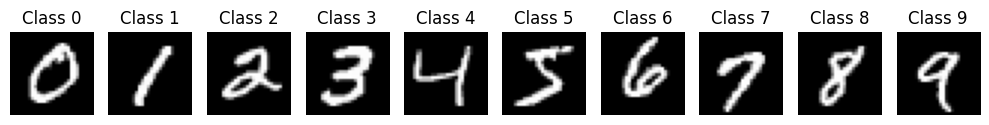

In [9]:
# New Section: Visualize one example image from each class (0-9) before training
classes = np.unique(y_train)
fig, axes = plt.subplots(1, len(classes), figsize=(10, 2))

for i, cls in enumerate(classes):
    # Get the first image of each class
    idx = np.where(y_train == cls)[0][0]
    image = x_train[idx].reshape(28, 28)  # Reshape to 2D for plotting
    
    # Plot the image
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Class {cls}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [11]:
# Step 3: Build the CNN model
model = models.Sequential([
    # Input layer
    # layers.Input(input_shape=(28, 28, 1))
    
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),  # Pooling layer
    
    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Pooling layer
    
    # Third Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten the 3D output to 1D for fully connected layers
    layers.Flatten(),
    
    # Fully connected layer with 64 units
    layers.Dense(64, activation='relu'),
    
    # Output layer with 10 units (one for each digit 0-9) and softmax activation
    layers.Dense(10, activation='softmax')
])



In [12]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
print(model.input_shape)
# None refers to the batch size, which can vary, 
# meaning the model can accept any number of images at once in a batch.

(None, 28, 28, 1)


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [15]:
# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 18s 5ms/step - loss: 0.1488 - accuracy: 0.9535 - val_loss: 0.0450 - val_accuracy: 0.9858
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.0375 - val_accuracy: 0.9882
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0368 - val_accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0323 - val_accuracy: 0.9906
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0217 - accuracy: 0.9932 - val_loss: 0.0283 - val_accuracy: 0.9920


In [16]:
# Step 6: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.0283 - accuracy: 0.9920 - 1s/epoch - 3ms/step

Test accuracy: 0.9919999837875366


1/1 [==============================] - 0s 375ms/step


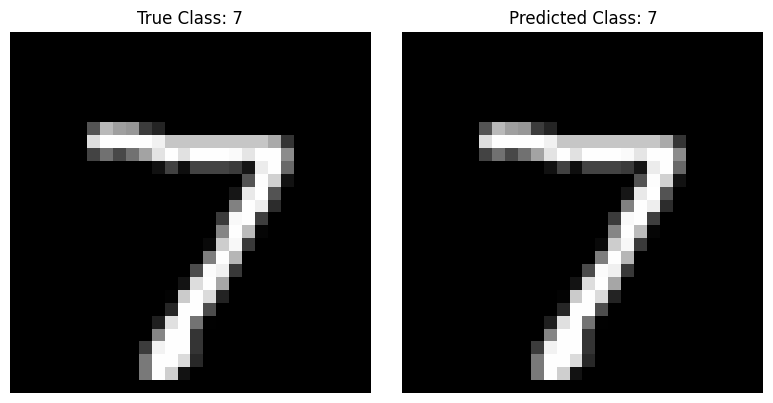

Predicted probabilities: [[1.4452925e-08 2.9781061e-06 3.7313137e-07 4.9052673e-05 6.3748718e-07
  9.5204463e-08 2.7755981e-10 9.9994385e-01 4.4018130e-08 2.8823561e-06]]


In [17]:
# Step 7: Pick a specific example from the test set (e.g., the first image)
index = 0  # Change this index to try predicting different test images
test_image = x_test[index]

# Display the true class of the test image
true_class = y_test[index]

# Add an extra dimension to the test image since the model expects a batch (even if it's just one image)
test_image_expanded = np.expand_dims(test_image, axis=0)

# Step 8: Use the trained model to predict the class
predicted_probabilities = model.predict(test_image_expanded)
predicted_class = np.argmax(predicted_probabilities)

# Step 9: Plot the true class image and predicted class
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the true class image
axes[0].imshow(test_image.reshape(28, 28), cmap='gray')
axes[0].set_title(f"True Class: {true_class}")
axes[0].axis('off')

# Plot the predicted class image (same image as true, but with predicted label)
axes[1].imshow(test_image.reshape(28, 28), cmap='gray')
axes[1].set_title(f"Predicted Class: {predicted_class}")
axes[1].axis('off')

plt.tight_layout()
plt.show()


# Print the predicted probabilities for clarity (optional)
print(f"Predicted probabilities: {predicted_probabilities}")


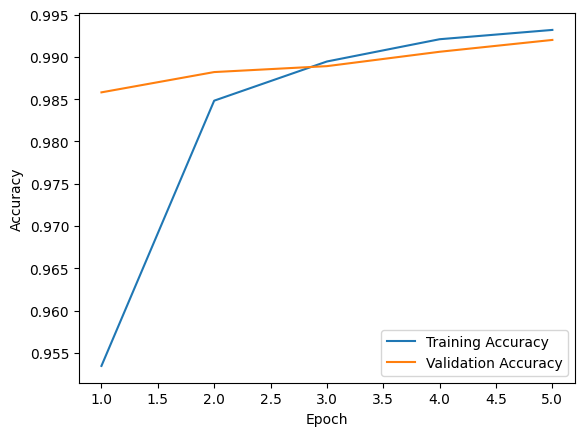

In [24]:
# Optional: Plot training and validation accuracy and loss
# Add this line to ensure that matplotlib uses the inline backend
# %matplotlib inline
limit = range(1, len(history.history['accuracy'])+1)
plt.plot(limit, history.history['accuracy'], label='Training Accuracy')
plt.plot(limit, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Save the trained model
model.save('cnn_model.h5')

# Save the training history (optional, if you want to save the history)
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
# After restarting the kernel, load the model and history back
from tensorflow.keras.models import load_model
import pickle

# Load the trained model
model = load_model('cnn_model.h5')

# Load the training history
with open('history.pkl', 'rb') as f:
    history = pickle.load(f)